#PageRank Implementations
By Iris Vukovic

The goal of this project is to code two different implementations of the PageRank Algorithm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

####Ex 1. Compute the PR vector of $M_m$ using the power method (adapted to PR computation).

First we upload the file that contains the data and construct the link matrix G.

In [ ]:
filename = '/content/p2p-Gnutella30.txt'

#create lists to hold edges
edges = []

#open the file and read it line by line
with open(filename, 'r') as file:
    for line in file:
        #skip the comment lines (those starting with #)
        if line.startswith('#'):
            continue
        #each line contains two node ids
        else:
            node1, node2 = map(int, line.split())
            edges.append((node1, node2))

print(edges[:10])  # Show first 10 edges


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)]


In [ ]:
#get the number of nodes
num_nodes = max(max(node1, node2) for node1, node2 in edges) + 1
print(num_nodes)

#create a np matrix of zeros
G = np.zeros((num_nodes, num_nodes))

#fill the matrix with edges
for node1, node2 in edges:
    G[node1, node2] = 1

#display link matrix for the first 10 nodes
print(G[:10, :10])


36682
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Due to the size of $G$, we will convert it to a sparse structure in order to avoid crashing the RAM.

In [ ]:
G_sparse = csr_matrix(G) #stores only the non-zero elements along with their row and column indice

In [ ]:
print(G_sparse[:10, :10])
print(G_sparse)
print()
print("Sparse Matrix (CSR format) for the first 10 nodes:")
print(G_sparse[:10, :10].toarray())  #Converting the sparse matrix slice to dense for printing

#THis is not sparse fix it
#when u do A make it sparse

  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (2, 141)	1.0
  (2, 343)	1.0
  (2, 2659)	1.0
  (2, 2660)	1.0
  (2, 2661)	1.0
  (2, 2662)	1.0
  (2, 2663)	1.0
  (2, 2664)	1.0
  (2, 2665)	1.0
  (2, 2666)	1.0
  (4, 1461)	1.0
  (4, 11100)	1.0
  (4, 11101)	1.0
  (4, 11102)	1.0
  (4, 11103)	1.0
  :	:
  (36655, 15428)	1.0
  (36655, 34258)	1.0
  (36655, 36672)	1.0
  (36655, 36673)	1.0
  (36655, 36674)	1.0
  (36658, 3716)	1.0
  (36658, 7815)	1.0
  (36658, 14301)	1.0
  (36658, 19059)	1.0
  (36658, 31897)	1.0
  (36658, 33099)	1.0
  (36658, 35222)	1.0
  (36658, 35987)	1.0
  (36658, 36665)	1.0
  (36658, 36666)	1.0
  (36674, 2643)	1.0
  (36674, 20111)	1.0
  (36674, 25837)	1.0
  (36674, 26762)	1.0
  (36674, 31187)	1.0
  (36674, 34258)	1.0
  (36674, 36547)	1.0
  (36674, 36675)	1.0
  (36674, 36676)	1.0
  (

Now we construct matrix $D$ which has the values of the out-degrees of each page. I also checked for dangling nodes just out ot of curiousity since it was implied by the algorithm we are using that the network would contain dangling nodes.

In [ ]:
import numpy as np

def compute_D(G):
    #number of nodes
    n = G.shape[0]

    #initialize the diagonal matrix D with zeros
    D = np.zeros((n, n))

    #compute the out-degree of each page aka sum of each column of G
    out_degrees = np.sum(G, axis=0)

    #fill D
    for j in range(n):
        if out_degrees[j] != 0:
            D[j][j] = 1 / out_degrees[j]  #D[j,j] is the reciprocal of the out-degree

    return D, out_degrees

def find_dangling_nodes(out_degrees):
  # A dangling node has an out-degree of zero
  dangling_nodes = np.where(out_degrees == 0)[0]  # Indices of dangling nodes
  return dangling_nodes


#compute D based on G
D, out_degrees = compute_D(G)
print(D)

dangling_nodes = find_dangling_nodes(out_degrees)

print("\nDangling nodes (indices):")
print(dangling_nodes)


[[0.25       0.         0.         ... 0.         0.         0.        ]
 [0.         0.16666667 0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]

Dangling nodes (indices):
[   11    33    54    64    75    88   205   250   274   285   354   365
   409   420   441   481   496   530   588   618   666   734   791   815
   883   912   926   937   957  1024  1026  1048  1059  1094  1136  1167
  1201  1244  1275  1285  1359  1369  1389  1401  1490  1507  1544  1636
  1643  1671  1689  1700  1762  1796  1806  1860  1882  1890  1899  1928
  1942  1980  1992  2014  2033  2088  2093  2137  2158  2179  2198  2313
  2427  2458  2475  2479  2565  2583  2614  2640  2688  2699  2990  3101
  3300  3361  3362

In [ ]:
A = G_sparse @ D
A_sparse = csr_matrix(A)
print(A_sparse[:10, :10])

  (0, 1)	0.16666666666666666
  (0, 2)	1.0
  (0, 3)	0.09090909090909091
  (0, 4)	0.16666666666666666
  (0, 5)	1.0
  (0, 6)	0.5
  (0, 7)	0.07142857142857142
  (0, 8)	1.0
  (0, 9)	0.14285714285714285


In [ ]:
# Out-degree: sum each row (number of outgoing links)
out_degrees = np.sum(A, axis=1)
print("Out-degrees:", out_degrees[:50])

# In-degree: sum each column (number of incoming links)
in_degrees = np.sum(A, axis=0)
print("In-degrees:", in_degrees[:50])

Out-degrees: [5.13852814 0.         4.74622132 0.         4.5        0.
 5.43452381 4.15952381 0.         0.         0.         8.24358974
 0.         0.         4.73571429 0.         0.         0.
 0.         0.         0.         0.         5.72916667 0.
 0.         0.         0.         0.         8.53333333 0.
 0.         0.         4.23174603 6.1        0.         0.
 0.         0.         0.         5.74285714 0.         0.
 0.         2.5766557  0.         3.76236998 3.06709957 0.
 6.28730159 0.        ]
In-degrees: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
def compute_z(G, m):
    """Compute the vector z, considering dangling nodes."""
    n = G.shape[0]
    out_degrees = np.sum(G, axis=0)

    #vector z where z_j is m/n if node j has outgoing links, otherwise 1/n
    z = np.full(n, m/n)  #start with m/n for all nodes
    z[out_degrees == 0] = 1 / n  #set to 1/n where node has no outgoing links

    return z

def pagerank_power_method(G, D, A, m=0.15, tol=1e-6, max_iter=100):
    #number of nodes
    n = G.shape[0]

    #initialize the PR vector with equal probability
    x = np.ones(n) / n

    # Matrix e (vector of ones)
    e = np.ones(n)

    #compute the vector z to handle dangling nodes
    z = compute_z(G, m)

    #iterate until convergence
    for i in range(max_iter):
        x_new = (1 - m) * np.dot(A, x) + np.dot(e, np.dot(z.T, x))

        #debugging: print intermediate values
        if i % 10 == 0:
            print(f"Iteration {i + 1}")
            print("PageRank vector:", x_new)
            print("Norm difference:", np.linalg.norm(x_new - x, np.inf))

        #check for convergence using infinity norm
        if np.linalg.norm(x_new - x, np.inf) < tol:
            print(f"Converged after {i+1} iterations.")
            return x_new

        # Update the PageRank vector for the next iteration
        x = x_new

    print(f"Reached max iterations ({max_iter}) without convergence.")
    return x


# Compute the PageRank vector
pr_vector = pagerank_power_method(G, D, A, m=0.15, tol=1e-6)

print("PageRank Vector:", pr_vector)


Iteration 1
PageRank vector: [1.23304491e-04 4.23385904e-06 1.14213907e-04 ... 4.23385904e-06
 4.23385904e-06 4.23385904e-06]
Norm difference: 0.0006115578092844867
Iteration 11
PageRank vector: [1.33020330e-04 4.42226517e-06 6.58721659e-05 ... 4.42226517e-06
 4.42226517e-06 4.42226517e-06]
Norm difference: 5.420804265467551e-05
Iteration 21
PageRank vector: [1.32699867e-04 4.42089184e-06 6.58675050e-05 ... 4.42089184e-06
 4.42089184e-06 4.42089184e-06]
Norm difference: 6.113489026653564e-07
Converged after 21 iterations.
PageRank Vector: [1.32699867e-04 4.42089184e-06 6.58675050e-05 ... 4.42089184e-06
 4.42089184e-06 4.42089184e-06]


Here i just wanted to check that the sum of all values is 1.

In [ ]:
print(sum(pr_vector))

0.9999999999998004


Here I've sorted the PR vector in descending order and plotted the top twenty more important nodes based on my results.

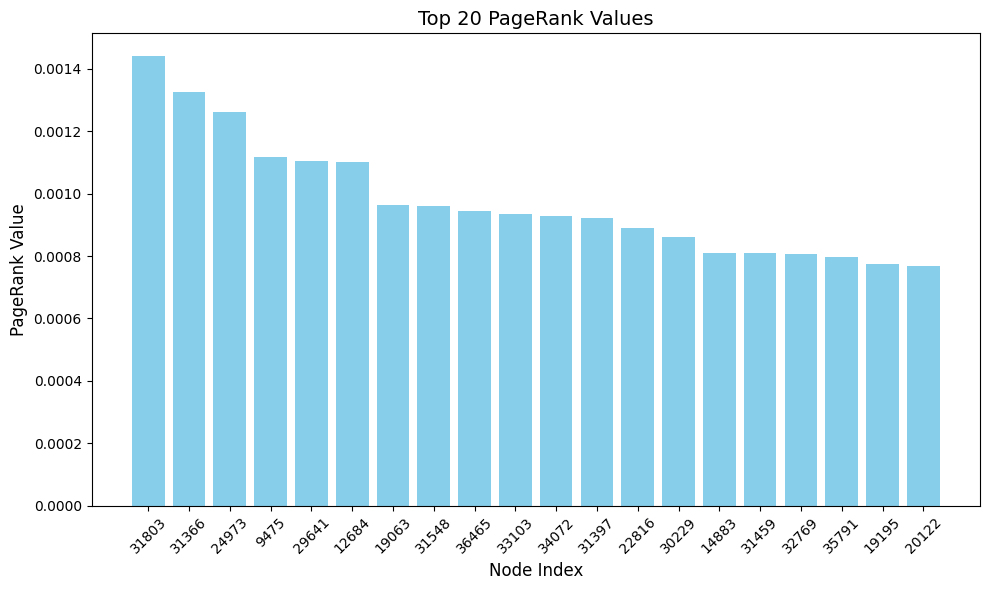

In [ ]:
#sort the PageRank vector in descending order
sorted_pr_vector = np.sort(pr_vector)[::-1]
sorted_indices = np.argsort(pr_vector)[::-1]  #get the indices of the sorted vector

#limit to the top 20 nodes
top_n = 20

sorted_pr_vector_top_n = sorted_pr_vector[:top_n]
sorted_indices_top_n = sorted_indices[:top_n]

#create a bar graph of the sorted PageRank values
plt.figure(figsize=(10, 6))

plt.bar(range(top_n), sorted_pr_vector_top_n, color='skyblue')

plt.xlabel('Node Index', fontsize=12)
plt.ylabel('PageRank Value', fontsize=12)
plt.title(f'Top {top_n} PageRank Values', fontsize=14)

plt.xticks(range(top_n), sorted_indices_top_n, rotation=45)  # Use the sorted indices for x-ticks

plt.tight_layout()

plt.show()

####Ex 2. Compute the PR vector of $M_m$ using the power method without storing matrices.

First, we'll consrtuct $L$ as a list of sets where each set contains the indices of pages linking to page $j$.

In [ ]:
def construct_L_sparse(G):
    # Convert the dense matrix G to a sparse matrix format (CSR format)
    G_sparse = csr_matrix(G)

    # Get the indices of non-zero elements for each column (i.e., which pages link to page j)
    L = {j: G_sparse[:, j].nonzero()[0].tolist() for j in range(G_sparse.shape[1])}

    return L

L = construct_L_sparse(G)

print("Set L for each node:")
for j in range(10):
    print(f"L_{j}: {L[j]}")

Set L for each node:
L_0: [1311, 1629, 5352, 9391]
L_1: [0, 3050, 16254, 21629, 26775, 28911]
L_2: [0]
L_3: [0, 1331, 3675, 5014, 11048, 15239, 18724, 30694, 31271, 31803, 34383]
L_4: [0, 1163, 3500, 14887, 22499, 35684]
L_5: [0]
L_6: [0, 24832]
L_7: [0, 4097, 4306, 5352, 6241, 8578, 15567, 15642, 16778, 17209, 21699, 22397, 25345, 25821]
L_8: [0]
L_9: [0, 14504, 19012, 20341, 24179, 25809, 30770]


Now we construct the function to compute the PageRank vector by implementing a version of the power method that doesn't store matrices.

In [ ]:
def pagerank_power_method_no_matrix(G, L, m=0.15, tol=1e-6, max_iter=100):

    n = len(G)  #number of nodes
    x = np.ones(n) / n  #initialize PageRank vector with uniform distribution
    xc = np.copy(x)  #copy of the previous PageRank vector for updates

    #compute number of outgoing links for each node
    n_out = np.array([len(L[j]) for j in range(n)])

    #iterate until convergence
    for iter in range(max_iter):
        #save the previous PageRank vector
        xc = np.copy(x)
        x.fill(0)  #reset the PageRank vector for the new iteration

        #loop over each node
        for j in range(n):
            if n_out[j] == 0:  #dangling node
                #distribute the PageRank evenly among all nodes
                x += xc[j] / n
            else:
                #distribute the PageRank of node j to the nodes it points to
                for i in L[j]:
                    x[i] += xc[j] / n_out[j]

        #spply the damping factor and teleportation
        x = (1 - m) * x + m / n

        #check convergence
        if np.linalg.norm(x - xc, np.inf) < tol:
            print(f"Converged after {iter + 1} iterations.")
            return x

    print(f"Reached max iterations ({max_iter}) without convergence.")
    return x

pr_vector = pagerank_power_method_no_matrix(G, L, m=0.15, tol=1e-6)
print("PageRank Vector:", pr_vector)


Converged after 21 iterations.
PageRank Vector: [1.32699867e-04 4.42089184e-06 6.58675050e-05 ... 4.42089184e-06
 4.42089184e-06 4.42089184e-06]


Again, I've sorted the PR vector in descending order and plotted the top twenty more important nodes.

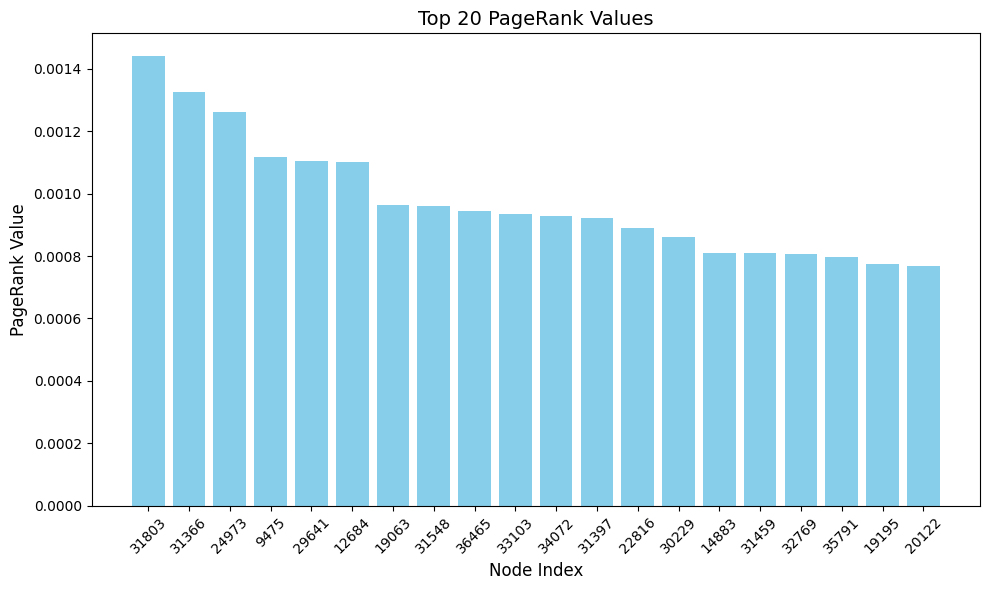

In [ ]:
#sort the PageRank vector in descending order
sorted_pr_vector = np.sort(pr_vector)[::-1]
sorted_indices = np.argsort(pr_vector)[::-1]  #get the indices of the sorted vector

#limit to the top 20 nodes
top_n = 20
sorted_pr_vector_top_n = sorted_pr_vector[:top_n]
sorted_indices_top_n = sorted_indices[:top_n]

#create a bar graph of the sorted PageRank values
plt.figure(figsize=(10, 6))

plt.bar(range(top_n), sorted_pr_vector_top_n, color='skyblue')

plt.xlabel('Node Index', fontsize=12)
plt.ylabel('PageRank Value', fontsize=12)
plt.title(f'Top {top_n} PageRank Values', fontsize=14)

plt.xticks(range(top_n), sorted_indices_top_n, rotation=45)  # Use the sorted indices for x-ticks

plt.tight_layout()

plt.show()

The top nodes align with the ones we found using the classical power method.